**Thinkful - Drill 2.4.3 - Assumptions of Linear Regression**

In [26]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
#import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Acquire, load, and preview the data.
df = pd.read_csv('Advertising.csv')
display(df.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

data['Predicted'] = pd.Series(predicted, index=data.index)
data['Residual'] = pd.Series(residual, index=data.index)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


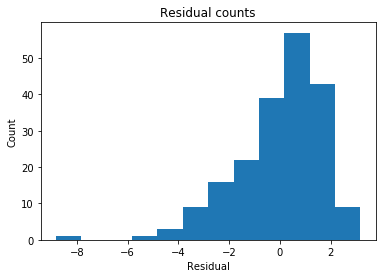

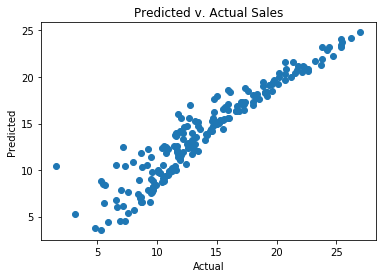

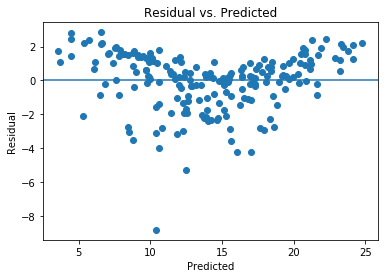

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [27]:
# This looks a bit concerning.
#plt.hist(residual)
binwidth = 1
plt.hist(residual, bins=np.arange(min(residual), max(residual) + binwidth, binwidth))
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(data['Sales'], predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted v. Actual Sales')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

correlation_matrix = X.corr()
display(correlation_matrix)

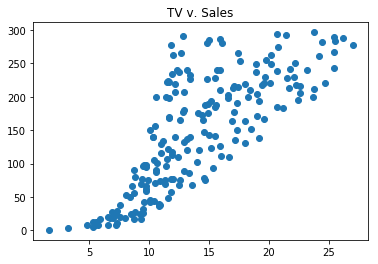

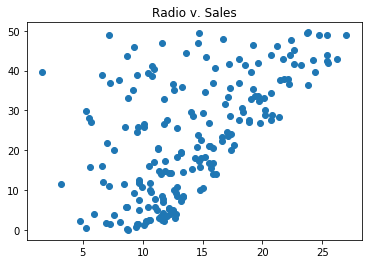

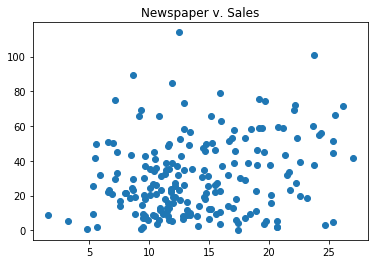

In [28]:
plt.scatter(data['Sales'], data['TV'])
plt.title('TV v. Sales')
plt.show()

plt.scatter(data['Sales'], data['Radio'])
plt.title('Radio v. Sales')
plt.show()

plt.scatter(data['Sales'], data['Newspaper'])
plt.title('Newspaper v. Sales')
plt.show()

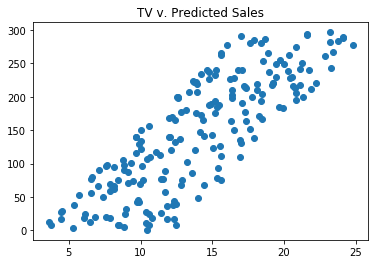

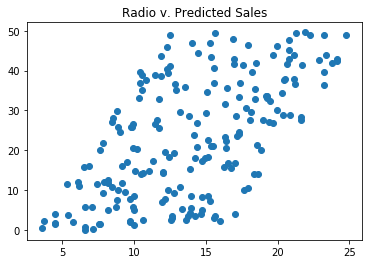

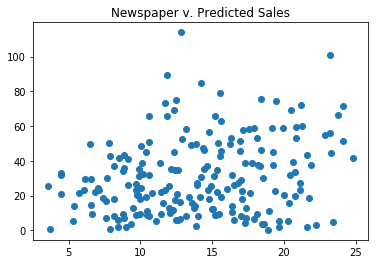

In [29]:
plt.scatter(predicted, data['TV'])
plt.title('TV v. Predicted Sales')
plt.show()

plt.scatter(predicted, data['Radio'])
plt.title('Radio v. Predicted Sales')
plt.show()

plt.scatter(predicted, data['Newspaper'])
plt.title('Newspaper v. Predicted Sales')
plt.show()

In [30]:
data.sort_values('Residual', ascending=True).head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted,Residual
130,131,0.700,39.600,8.700,1.600,10.428,-8.828
5,6,8.700,48.900,75.000,7.200,12.478,-5.278
178,179,276.700,2.300,23.700,11.800,16.011,-4.211
35,36,290.700,4.100,8.500,12.800,17.007,-4.207
126,127,7.800,38.900,50.600,6.600,10.577,-3.977
25,26,262.900,3.500,19.500,12.000,15.610,-3.610
78,79,5.400,29.900,9.400,5.300,8.813,-3.513
75,76,16.900,43.700,89.400,8.700,11.858,-3.158
158,159,11.700,36.900,45.200,7.300,10.384,-3.084
56,57,7.300,28.100,41.400,5.500,8.528,-3.028


**Addressing Heteroscedacity and Multivariate Non-Normality**

It appears that major outliers are contributing to the heteroscedacity and multivariate non-normality. From the table above, it appears that the greatest residuals occur when the total sales are low. Therefore, I added a line that omits all rows for sales < 12. The number '12' was selected by iterating over different values (starting with '5') and increasing. The tradeoffs are that while the residuals are now normally distributed, excluding these rows resulted in a loss of data and could mean that overfitting is a concern, as the R-squared value increased from 0.89 to 0.95. 

In [47]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn import linear_model

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
pd.options.mode.chained_assignment = None  # default='warn'

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Acquire, load, and preview the data.
df = pd.read_csv('Advertising.csv')
display(df.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
data = df.copy()
data = df[df['Sales'] > 12]
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

data['Predicted'] = pd.Series(predicted, index=data.index)
data['Residual'] = pd.Series(residual, index=data.index)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.0444556   0.25595631 -0.00180766]]

Intercept: 
 [ 1.41151546]

R-squared:
0.950945620531


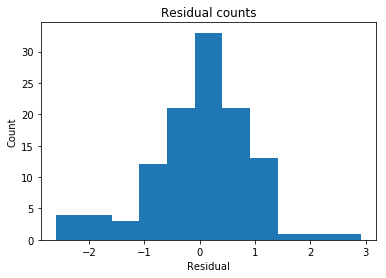

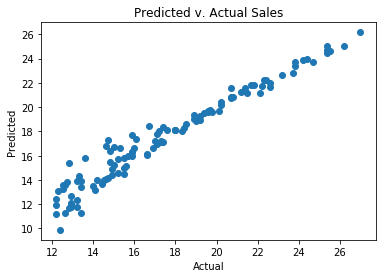

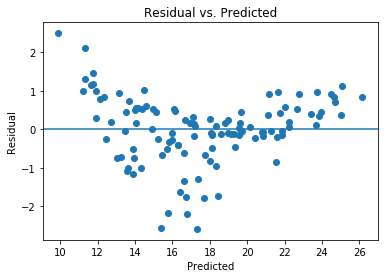

,TV,Radio,Newspaper
TV,1.000,-0.184,-0.108
Radio,-0.184,1.000,0.325
Newspaper,-0.108,0.325,1.000


In [48]:
# This looks a bit concerning.
#plt.hist(residual)
binwidth = 0.5
plt.hist(residual, bins=np.arange(min(residual), max(residual) + binwidth, binwidth))
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(data['Sales'], predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted v. Actual Sales')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

correlation_matrix = X.corr()
display(correlation_matrix)